# RETENCION CLIENTES EMPRESA DE TELEFONIA

In [45]:
#Importamos  Libreras
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns # Entendiendo mis variables
import pprint
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Librería matriz de confusión
from sklearn.metrics import confusion_matrix
# Librería para curva de ROC
from sklearn.metrics import roc_curve, auc
# Librerias para regresión logística
import statsmodels.api as sm
import statsmodels.formula.api as smf
# Libreria para trabajar cadenas de texto
import re
# Librería para transformar etiquetas de texto (categóricas) en números. 
from sklearn.preprocessing import LabelEncoder
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression  
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics




In [46]:
# Cargo Datasets y Verificamos su consistencia:

url = 'https://raw.githubusercontent.com/yoriohe/PR0Y3CT0_C0D3RH0US3/main/WA_Fn-UseC_-Telco-Customer-Churn-Base.csv'

df=  pd.read_csv(url,sep=",")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [47]:
# Verificamos que Tipos de Datos son:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [48]:
# Convierto la columna de TotalCharges de Tipo Object a float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [49]:
#La columna de Senior Citizen, la transformamos en SI o NO
cod_Jubilado = {0:'No', 1: 'Si'}
df['SeniorCitizen'] = df['SeniorCitizen'].map(cod_Jubilado)

In [50]:
# Verificamos primeros datos estadísticos que encontramos en el dataset
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


In [51]:
# Verificamos la columna Modificada
print(df['SeniorCitizen'])

0       No
1       No
2       No
3       No
4       No
        ..
7038    No
7039    No
7040    No
7041    Si
7042    No
Name: SeniorCitizen, Length: 7043, dtype: object


In [52]:
#Chequeo que no haya ningún duplicado en la columna de "customerID"
boolean = df.duplicated(subset=['customerID']).any()
print(boolean, end='\n\n')

False



In [53]:
# Analizamos características del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [54]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


In [55]:
#Busco valores nulos
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
# Llenar los valores faltantes en TotalCharges con MonthlyCharges
df['TotalCharges'].fillna(df['MonthlyCharges'], inplace=True)

In [13]:
#Chequeo nuevamente si existen valores nulos
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
#Me fijo las categorias dentro de cada columna para ver si hay algún error.
for columna in df:
  print(columna, df[columna].unique())

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ['Female' 'Male']
SeniorCitizen ['No' 'Si']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit c

## **Features Selection**

In [15]:
# guardo la base para cualquier consulta que quiera realizar
df1 = df.copy(deep = True)
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
#Desccartamos la columna Customer ID y  Antigüedad_Categoria
columns_to_drop = ['customerID', 'Antigüedad_Categoria']
df1 = df1.drop(columns=columns_to_drop, errors='ignore')

In [17]:
df1.describe().columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [18]:
#Buscamos aquellos features que no son numéricos si no se encuentran en la función describe.
text_data_features = [i for i in list(df1.columns) if i not in list(df1.describe().columns)]

In [19]:
# Estos son los que deberé converir en 0 y 1
text_data_features

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [20]:
le = LabelEncoder()
for i in text_data_features :
    df1[i] = le.fit_transform(df1[i])
    print(i,' : ',df1[i].unique(),' = ',le.inverse_transform(df1[i].unique()))

gender  :  [0 1]  =  ['Female' 'Male']
SeniorCitizen  :  [0 1]  =  ['No' 'Si']
Partner  :  [1 0]  =  ['Yes' 'No']
Dependents  :  [0 1]  =  ['No' 'Yes']
PhoneService  :  [0 1]  =  ['No' 'Yes']
MultipleLines  :  [1 0 2]  =  ['No phone service' 'No' 'Yes']
InternetService  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
OnlineBackup  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
DeviceProtection  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
TechSupport  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingTV  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingMovies  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Contract  :  [0 1 2]  =  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  [1 0]  =  ['Yes' 'No']
PaymentMethod  :  [2 3 0 1]  =  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  :  [0 1]  =  ['No' 'Yes']


In [21]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [22]:
#Busco ver cuantos servicios de internet tiene cada cliente. Creo columna.

df1["Cant_Internet"] = df1["InternetService"] + df1["OnlineSecurity"] + df1["OnlineBackup"] + df1["DeviceProtection"] + df1["TechSupport"] + df1["StreamingTV"] + df1["StreamingMovies"]

# Cambiar cualquier valor igual a 'No internet service' a 0
df1["Cant_Internet"] = df1["Cant_Internet"].apply(lambda x: 0 if x == 'No internet service' else x)

# Cambiar cualquier valor mayor a 1 a 1
df1["Cant_Internet"] = df1["Cant_Internet"].clip(upper=1)

In [23]:
# Creo la columna para saber si tienen servicio telefónico
df1["PhoneServices"]= df1["PhoneService"]+df1["MultipleLines"]
#Creo columna para ver quienes tienen internet + telefono.
df1["pack"]= df1["PhoneServices"] + df1["InternetService"]

In [24]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Cant_Internet,PhoneServices,pack
0,0,0,1,0,1,0,1,0,0,2,...,0,0,1,2,29.85,29.85,0,1,1,1
1,1,0,0,0,34,1,0,0,2,0,...,0,1,0,3,56.95,1889.50,0,1,1,1
2,1,0,0,0,2,1,0,0,2,2,...,0,0,1,3,53.85,108.15,1,1,1,1
3,1,0,0,0,45,0,1,0,2,0,...,0,1,0,0,42.30,1840.75,0,1,1,1
4,0,0,0,0,2,1,0,1,0,0,...,0,0,1,2,70.70,151.65,1,1,1,2


## TRAIN Y TEST 

In [25]:
# Dividimos aleatoriamente los datos en conjuntos de entrenamiento y prueba para modelos de aprendizaje automático.
cantidad_registros = df1.shape[0]
semilla = 15
np.random.seed(semilla)
serie_random = np.random.rand(cantidad_registros)
df1['TRAIN'] = np.where(serie_random < 0.3, 0, 1)

In [26]:
print(f"La cantidad de datos para entrenamiento son {df1['TRAIN'].sum()} y para test son {df1.shape[0] - df1['TRAIN'].sum()}")

La cantidad de datos para entrenamiento son 4937 y para test son 2106


# Modelamos

In [27]:
# Cómo quedó la división??
resumen = df1.groupby('TRAIN').agg(      
    Cant = ('Churn', 'count'),
    Cant_Renuncia = ('Churn', 'sum'),    
    Tasa_Renuncia = ('Churn', 'mean')
).reset_index()
# Calcular la tasa de éxito en porcentaje
resumen['Tasa_Renuncia'] = (resumen['Tasa_Renuncia'] * 100).round(1)
resumen

,TRAIN,Cant,Cant_Renuncia,Tasa_Renuncia
0,0,2106,532,25.3
1,1,4937,1337,27.1


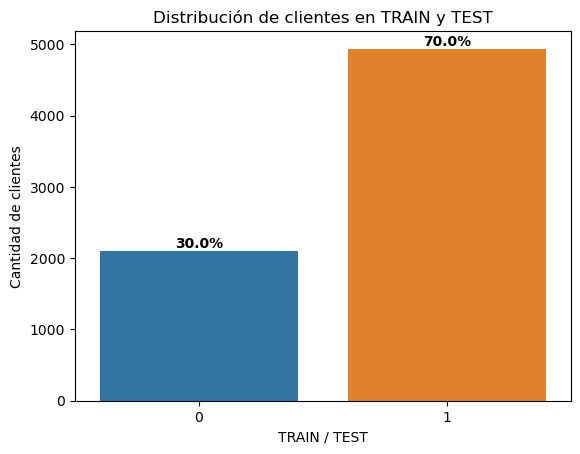

In [28]:
cantidad = len(df1['Churn'])

sns.countplot(data = df1,
              x = "TRAIN")
plt.xlabel('TRAIN / TEST')
plt.ylabel('Cantidad de clientes')
plt.title('Distribución de clientes en TRAIN y TEST')
ax = plt.gca()
for p in ax.patches:
    x_text = p.get_x() + p.get_width() / 2.0  # Calcula la posición x del texto
    y_text = p.get_height()  # Toma la altura de la columna
    ax.text(x_text, y_text, f'{str(round(int(y_text)/cantidad,2) * 100)}%', # Indica posición x e y, y texto a mostrar 
            ha = 'center', # Alineación horizontal 
            va = 'bottom',  # Alineación vertical
            fontsize = 10, color = 'black', fontweight = 'bold')
plt.show()

Text(0.5, 1.0, '¿Es la tasa de renuncia igual en ambas subporciones de la muestra?')

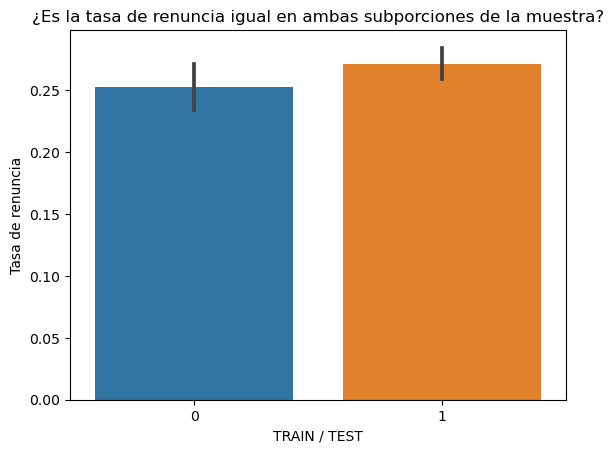

In [29]:
sns.barplot(data = df1,
                x = 'TRAIN',
                y = 'Churn')
plt.xlabel('TRAIN / TEST')
plt.ylabel('Tasa de renuncia')
plt.title('¿Es la tasa de renuncia igual en ambas subporciones de la muestra?')

## La respuesta es **"Son similares  =>Para Entrenamiento es del 27,1 % y para test es del 25,3%"**

# Modelo Base - Regresión Logística

In [30]:
# Genero el modelo
formula = "Churn ~ Cant_Internet+PhoneServices+InternetService+PaymentMethod"
reg_log = smf.logit(formula, data = df1[df1['TRAIN']==1]).fit()
# Ver el resumen de resultados
print(reg_log.summary())

Optimization terminated successfully.
         Current function value: 0.573134
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 4937
Model:                          Logit   Df Residuals:                     4932
Method:                           MLE   Df Model:                            4
Date:                Fri, 02 Feb 2024   Pseudo R-squ.:                 0.01872
Time:                        13:50:55   Log-Likelihood:                -2829.6
converged:                       True   LL-Null:                       -2883.5
Covariance Type:            nonrobust   LLR p-value:                 2.005e-22
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.9680      0.170     -5.711      0.000      -1.300      -0.636
Cant_Internet 

In [31]:
# Ver coeficientes y p valores
coeficientes = reg_log.params
pvalores = reg_log.pvalues
print("")
print("Coeficientes:")
print(coeficientes.round(4))
print("")
print("P-Values:")
print(pvalores.round(6))


Coeficientes:
Intercept         -0.9680
Cant_Internet     -0.6952
PhoneServices      0.1796
InternetService   -0.1153
PaymentMethod      0.2459
dtype: float64

P-Values:
Intercept          0.000000
Cant_Internet      0.000010
PhoneServices      0.000000
InternetService    0.013346
PaymentMethod      0.000000
dtype: float64


El modelo indica que hay una relación significativa entre las variables predictoras (Contract y PaymentMethod) y la variable dependiente Churn(Renuncia). 

1. Coeficientes del Modelo:
Intercept: -3.2840
Contract_pred: 4.8797
tenure_pred: 3.2284
InternetService: -0.0987
PaymentMethod: -0.0981
2. Estadísticas de Ajuste del Modelo:
Pseudo R-squared: 0.1884
El Pseudo R-squared proporciona una medida de cuánta varianza en la variable de respuesta (Churn) se explica por el modelo. En este caso, el 18.84% de la variabilidad se explica por las variables en el modelo.
Log-Likelihood: -2340.3
La log-verosimilitud es una medida de la adecuación del modelo. Cuanto más alto, mejor se ajusta el modelo a los datos.
3. Evaluación de la Convergencia:
Convergencia: Sí (converged: True)
Indica que el algoritmo de optimización ha convergido con éxito a una solución.
4. Pruebas de Significancia:
Prueba de Razón de Verosimilitud (LLR p-value): 6.449e-234
El p-valor extremadamente bajo indica que al menos una de las variables en el modelo es significativa para predecir la variable de respuesta "Churn".
5. Interpretación de Coeficientes:
Intercept: El log-odds de "Churn" cuando todas las demás variables son cero.
Contract_pred: Un aumento en la variable Contract_pred se asocia con un aumento de 4.8797 unidades en el log-odds de "Churn".
tenure_pred: Un aumento en la variable tenure_pred se asocia con un aumento de 3.2284 unidades en el log-odds de "Churn".
InternetService: Un aumento en la variable InternetService se asocia con una disminución de 0.0987 unidades en el log-odds de "Churn".
PaymentMethod: Un aumento en la variable PaymentMethod se asocia con una disminución de 0.0981 unidades en el log-odds de "Churn".


In [32]:
# Predicciones 
df1['Predict_Prob_RegLog_1'] = reg_log.predict(df1)
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Cant_Internet,PhoneServices,pack,TRAIN,Predict_Prob_RegLog_1
0,0,0,1,0,1,0,1,0,0,2,...,1,2,29.85,29.85,0,1,1,1,1,0.270558
1,1,0,0,0,34,1,0,0,2,0,...,0,3,56.95,1889.50,0,1,1,1,0,0.321719
2,1,0,0,0,2,1,0,0,2,2,...,1,3,53.85,108.15,1,1,1,1,0,0.321719
3,1,0,0,0,45,0,1,0,2,0,...,0,0,42.30,1840.75,0,1,1,1,1,0.184882
4,0,0,0,0,2,1,0,1,0,0,...,1,2,70.70,151.65,1,1,1,2,0,0.248418


Estas probabilidades representan la probabilidad estimada de que cada observación en el conjunto de datos pertenezca a la clase positiva ( 'Churn').

<Axes: xlabel='Predict_Prob_RegLog_1', ylabel='Probability'>

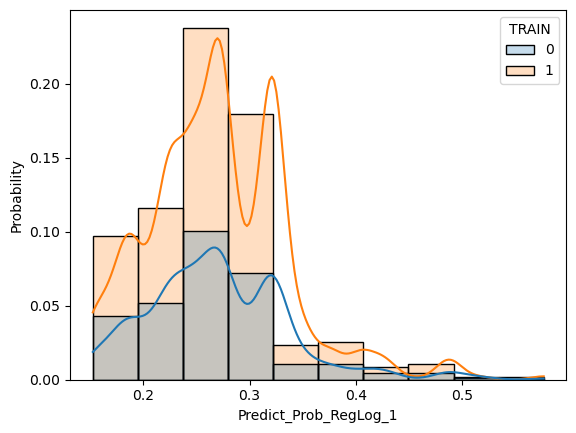

In [33]:
# Análisis de distribución: ¿Las predicciones se distribuyen igual?
sns.histplot(data = df1,
             x = 'Predict_Prob_RegLog_1',
             bins = 10,            
             alpha = 0.25,
             kde = True,
             stat='probability',
             hue = 'TRAIN')

In [34]:
# Groupby por prediccion de clase: 
df1['Predict_RegLog_Clase'] = df1['Predict_Prob_RegLog_1'] > 0.5
resultados = df1.groupby('Predict_RegLog_Clase').agg(
    Cant = ('Predict_RegLog_Clase', 'count'),              
    Cant_Churn = ('Churn', 'sum'),            
    Tasa_Churn = ('Churn', 'mean')    
).reset_index()
resultados

,Predict_RegLog_Clase,Cant,Cant_Churn,Tasa_Churn
0,False,7009,1856,0.264802
1,True,34,13,0.382353


Grupo False (Probabilidad <= 0.5):

Hay 5835 observaciones en este grupo.

De estas, 1154 están clasificadas como "Churn".

La tasa de "Churn" en este grupo es 0.197772 (19.77%).

Grupo True (Probabilidad > 0.5):

Hay 1208 observaciones en este grupo.

De estas, 715 están clasificadas como "Churn".

La tasa de "Churn" en este grupo es 0.591887 (59.19%).

Esta tabla te proporciona información sobre cómo se distribuyen las predicciones del modelo en función de la probabilidad y cómo se relaciona con la ocurrencia de "Churn". El grupo con probabilidades mayores a 0.5 tiene una tasa de "Churn" más alta en comparación con el grupo con probabilidades menores o iguales a 0.5.

## **Métricas:**

**A continuación vamos a calcular algunas métricas y análisis interesantes:**

**Matriz de confusión: usaremos un corte de 40% para definir la clasificación de sobrevive o no. Es decir, si la probabilidad es > 0.4, entonces asumimos que sobrevive.
Métricas que surgen de esa matriz
Curva de ROC y AUC**

In [35]:
# 1) Matriz de Confusión 
# Paso 1: Clasificar a los Clientes según las predicciones 
df1['Churn_Pred_1'] = np.where(df1['Predict_Prob_RegLog_1'] > 0.4, 1, 0)

# Paso 2:  Calcular la matriz de confusión para test y train
confusion_entrenamiento = confusion_matrix(df1[df1['TRAIN'] == 1]['Churn'], 
                                           df1[df1['TRAIN'] == 1]['Churn_Pred_1'])

confusion_test = confusion_matrix(df1[df1['TRAIN'] == 0]['Churn'], 
                                    df1[df1['TRAIN'] == 0]['Churn_Pred_1'])

print('Matriz de Confusión en entrenamiento:')
print(confusion_entrenamiento)
print('Matriz de Confusión en testeo:')
print(confusion_test)


Matriz de Confusión en entrenamiento:
[[3446  154]
 [1254   83]]
Matriz de Confusión en testeo:
[[1507   67]
 [ 498   34]]


**Matriz de Confusión en Entrenamiento:**


Verdaderos Positivos (TP): 786

El modelo predijo correctamente la clase positiva (Churn) en 786 casos.

Verdaderos Negativos (TN): 2876

El modelo predijo correctamente la clase negativa (No Churn) en 2876 casos.

Falsos Positivos (FP): 724

El modelo predijo incorrectamente la clase positiva (Churn) en 724 casos (falsos alarmas de Churn).

Falsos Negativos (FN): 551

El modelo predijo incorrectamente la clase negativa (No Churn) en 551 casos (omisiones de Churn).


**Matriz de Confusión en Testeo:**

Verdaderos Positivos (TP): 311

El modelo predijo correctamente la clase positiva (Churn) en 311 casos.

Verdaderos Negativos (TN): 1271

El modelo predijo correctamente la clase negativa (No Churn) en 1271 casos.
Falsos Positivos (FP): 303


El modelo predijo incorrectamente la clase positiva (Churn) en 303 casos (falsos alarmas de Churn).
Falsos Negativos (FN): 221


El modelo predijo incorrectamente la clase negativa (No Churn) en 221 casos (omisiones de Churn).

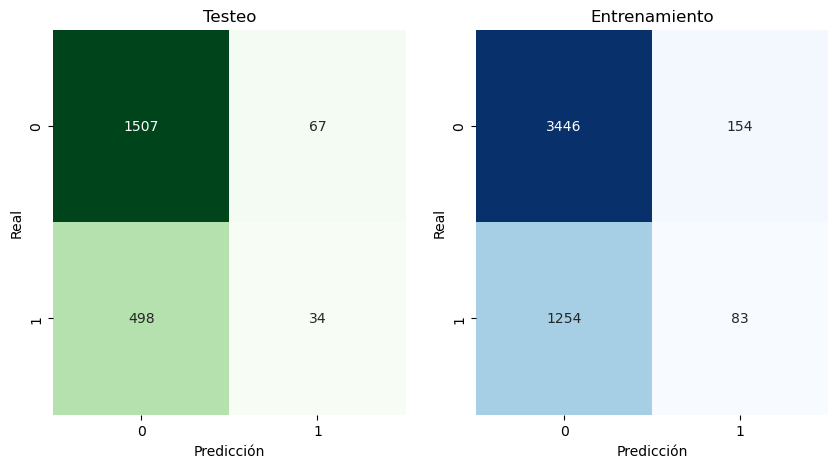

In [36]:
# Paso 3: Grafico
# Primero defino la estructura de mis gráficos a mostras
fig, ax = plt.subplots(nrows = 1,
                      ncols = 2,
                      figsize = (10,5)) 

# Luego indico lo que voy a dibujar en el primer cuadrante
sns.heatmap(confusion_test, 
            annot=True, fmt='d', cmap='Greens', cbar=False, 
            ax=ax[0])
ax[0].set_title('Testeo')
ax[0].set_xlabel('Predicción')
ax[0].set_ylabel('Real')

# Luego indico lo que voy a dibujar en el segundo cuadrante
sns.heatmap(confusion_entrenamiento, 
            annot=True, fmt='d', cmap='Blues', cbar=False, 
            ax=ax[1])
ax[1].set_title('Entrenamiento')
ax[1].set_xlabel('Predicción')
ax[1].set_ylabel('Real')

# Muestra
plt.show()

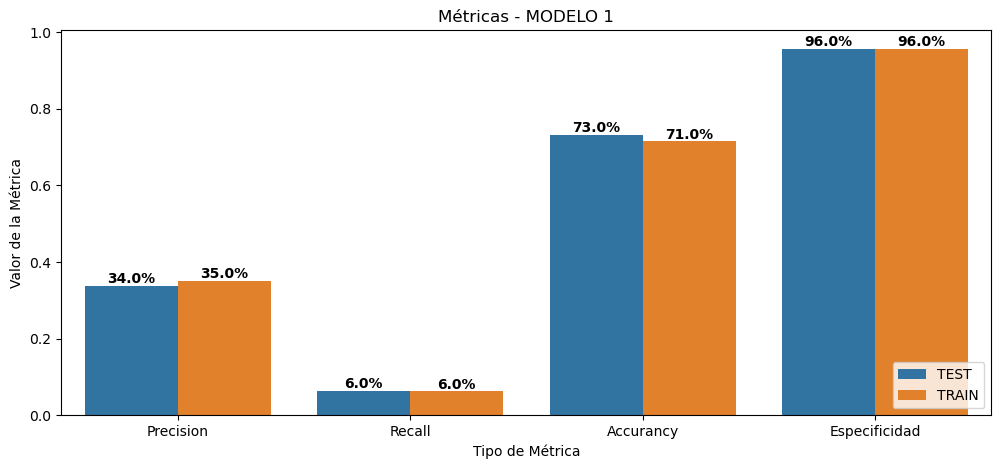

In [37]:
# 2) Calculemos las metricas, para eso vamos a guardar el resultado de cada cuadrante para utilizarlos 

# Paso 1: capturo cada uno de los elementos de la matriz de confusión 
Total_TEST = sum(sum(confusion_test))
Total_TRAIN = sum(sum(confusion_entrenamiento))
TP_TEST = confusion_test[1,1]
TP_TRAIN = confusion_entrenamiento[1,1]
TN_TEST = confusion_test[0,0]
TN_TRAIN = confusion_entrenamiento[0,0]
FP_TEST = confusion_test[0,1]
FP_TRAIN = confusion_entrenamiento[0,1]
FN_TEST = confusion_test[1,0]
FN_TRAIN = confusion_entrenamiento[1,0]

# Paso 2: Calculo métricas
Precision_TEST = TP_TEST / (TP_TEST + FP_TEST)
Precision_TRAIN = TP_TRAIN / (TP_TRAIN + FP_TRAIN)
Recall_TEST = TP_TEST / (TP_TEST + FN_TEST)
Recall_TRAIN = TP_TRAIN / (TP_TRAIN + FN_TRAIN)
Accurancy_TEST = (TP_TEST + TN_TEST) / Total_TEST
Accurancy_TRAIN = (TP_TRAIN + TN_TRAIN) / Total_TRAIN
Especificidad_TEST = TN_TEST / (TN_TEST + FP_TEST)
Especificidad_TRAIN = TN_TRAIN / (TN_TRAIN + FP_TRAIN)

# Paso 3: Presento todo en una misma tabla 
metricas = pd.DataFrame(columns=['Poblacion', 'Metrica','Valor'])

# Precision
nuevo_dato = {'Poblacion': 'TEST', 
              'Metrica': 'Precision',
              'Valor': Precision_TEST}
metricas = pd.concat([metricas, pd.DataFrame([nuevo_dato])], ignore_index=True)
nuevo_dato = {'Poblacion': 'TRAIN', 
              'Metrica': 'Precision',
              'Valor': Precision_TRAIN}
metricas = pd.concat([metricas, pd.DataFrame([nuevo_dato])], ignore_index=True)

# Recall
nuevo_dato = {'Poblacion': 'TEST', 
              'Metrica': 'Recall',
              'Valor': Recall_TEST}
metricas = pd.concat([metricas, pd.DataFrame([nuevo_dato])], ignore_index=True)
nuevo_dato = {'Poblacion': 'TRAIN', 
              'Metrica': 'Recall',
              'Valor': Recall_TRAIN}
metricas = pd.concat([metricas, pd.DataFrame([nuevo_dato])], ignore_index=True)

# Accurancy
nuevo_dato = {'Poblacion': 'TEST', 
              'Metrica': 'Accurancy',
              'Valor': Accurancy_TEST}
metricas = pd.concat([metricas, pd.DataFrame([nuevo_dato])], ignore_index=True)
nuevo_dato = {'Poblacion': 'TRAIN', 
              'Metrica': 'Accurancy',
              'Valor': Accurancy_TRAIN}
metricas = pd.concat([metricas, pd.DataFrame([nuevo_dato])], ignore_index=True)

# Especificidad
nuevo_dato = {'Poblacion': 'TEST', 
              'Metrica': 'Especificidad',
              'Valor': Especificidad_TEST}
metricas = pd.concat([metricas, pd.DataFrame([nuevo_dato])], ignore_index=True)
nuevo_dato = {'Poblacion': 'TRAIN', 
              'Metrica': 'Especificidad',
              'Valor': Especificidad_TRAIN}
metricas = pd.concat([metricas, pd.DataFrame([nuevo_dato])], ignore_index=True)

# Paso 4: Grafico 
plt.figure(figsize=(12, 5))
sns.barplot(data=metricas,
            x='Metrica',
            y='Valor',
            hue='Poblacion')
plt.xlabel('Tipo de Métrica')
plt.ylabel('Valor de la Métrica')
plt.title('Métricas - MODELO 1')
ax = plt.gca()
for p in ax.patches:
    x_text = p.get_x() + p.get_width() / 2.0
    y_text = p.get_height()
    ax.text(x_text, y_text, f'{str(round(y_text, 2) * 100)}%',
            ha='center',
            va='bottom',
            fontsize=10, color='black', fontweight='bold')

plt.legend(loc='lower right')    
plt.show()


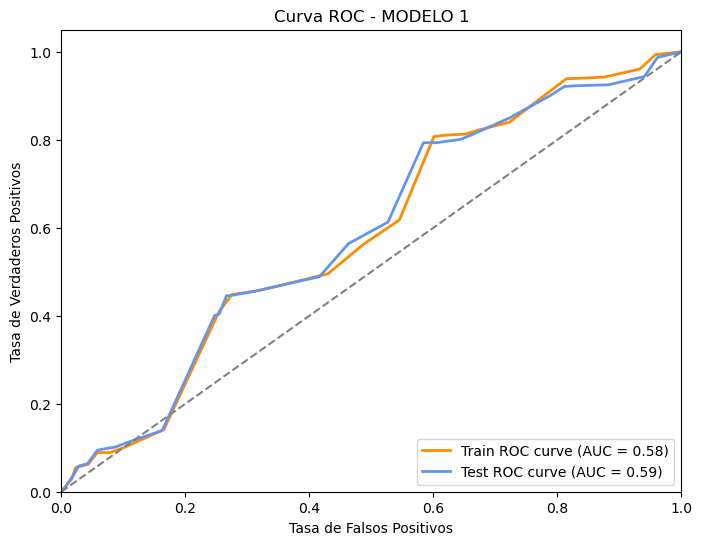

In [38]:
# 3) Curvas de ROC
# Calcula las curvas ROC y el área bajo la curva (AUC) para entrenamiento y prueba

y_train = df1.loc[df1['TRAIN'] == 1,'Churn']
y_train_proba = df1.loc[df1['TRAIN'] == 1,'Predict_Prob_RegLog_1']
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
roc_auc_train = auc(fpr_train, tpr_train)

y_test = df1.loc[df1['TRAIN'] == 0,'Churn']
y_test_proba = df1.loc[df1['TRAIN'] == 0,'Predict_Prob_RegLog_1']
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
roc_auc_test = auc(fpr_test, tpr_test)

# Grafica las curvas ROC en el mismo gráfico
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'Train ROC curve (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='cornflowerblue', lw=2, label=f'Test ROC curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - MODELO 1')
plt.legend(loc='lower right')
plt.show()

Conclusiones:

El modelo tiene un buen desempeño en la clasificación general, con un alto valor de accuracy.
La precisión y el recall varían entre las clases, con una mayor precisión para la clase 0 y un recall más bajo para la clase 1.
El f1-score ponderado proporciona una medida general del rendimiento del modelo.
Las métricas de validación cruzada refuerzan la evaluación del modelo en diferentes particiones del conjunto de datos, mostrando una consistencia en su rendimiento.


## Modelo 2 - CON DIFERENTES FEATURES

In [39]:
# Genero el modelo
formula = "Churn ~ Cant_Internet+pack+ tenure"
reg_log = smf.logit(formula, data = df1[df1['TRAIN']==1]).fit()
# Ver el resumen de resultados
print(reg_log.summary())

Optimization terminated successfully.
         Current function value: 0.509712
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 4937
Model:                          Logit   Df Residuals:                     4933
Method:                           MLE   Df Model:                            3
Date:                Fri, 02 Feb 2024   Pseudo R-squ.:                  0.1273
Time:                        13:50:55   Log-Likelihood:                -2516.4
converged:                       True   LL-Null:                       -2883.5
Covariance Type:            nonrobust   LLR p-value:                8.207e-159
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.2309      0.152     -1.517      0.129      -0.529       0.068
Cant_Internet    -0.

In [40]:
# Ver coeficientes y p valores
coeficientes = reg_log.params
pvalores = reg_log.pvalues
print("")
print("Coeficientes:")
print(coeficientes.round(4))
print("")
print("P-Values:")
print(pvalores.round(6))


Coeficientes:
Intercept       -0.2309
Cant_Internet   -0.3360
pack             0.2490
tenure          -0.0417
dtype: float64

P-Values:
Intercept        0.129371
Cant_Internet    0.034734
pack             0.000000
tenure           0.000000
dtype: float64


In [41]:
# 1) Matriz de Confusión 
# Paso 1: Clasificar a los Clientes según las predicciones 
df1['Churn_Pred_1'] = np.where(df1['Predict_Prob_RegLog_1'] > 0.4, 1, 0)

# Paso 2:  Calcular la matriz de confusión para test y train
confusion_entrenamiento = confusion_matrix(df1[df1['TRAIN'] == 1]['Churn'], 
                                           df1[df1['TRAIN'] == 1]['Churn_Pred_1'])

confusion_test = confusion_matrix(df1[df1['TRAIN'] == 0]['Churn'], 
                                    df1[df1['TRAIN'] == 0]['Churn_Pred_1'])

print('Matriz de Confusión en entrenamiento:')
print(confusion_entrenamiento)
print('Matriz de Confusión en testeo:')
print(confusion_test)


Matriz de Confusión en entrenamiento:
[[3446  154]
 [1254   83]]
Matriz de Confusión en testeo:
[[1507   67]
 [ 498   34]]


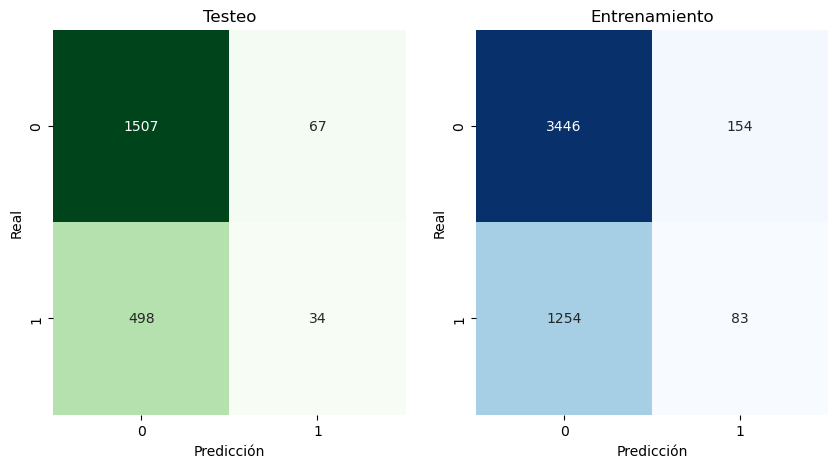

In [42]:
# Paso 3: Grafico
# Primero defino la estructura de mis gráficos a mostras
fig, ax = plt.subplots(nrows = 1,
                      ncols = 2,
                      figsize = (10,5)) 

# Luego indico lo que voy a dibujar en el primer cuadrante
sns.heatmap(confusion_test, 
            annot=True, fmt='d', cmap='Greens', cbar=False, 
            ax=ax[0])
ax[0].set_title('Testeo')
ax[0].set_xlabel('Predicción')
ax[0].set_ylabel('Real')

# Luego indico lo que voy a dibujar en el segundo cuadrante
sns.heatmap(confusion_entrenamiento, 
            annot=True, fmt='d', cmap='Blues', cbar=False, 
            ax=ax[1])
ax[1].set_title('Entrenamiento')
ax[1].set_xlabel('Predicción')
ax[1].set_ylabel('Real')

# Muestra
plt.show()

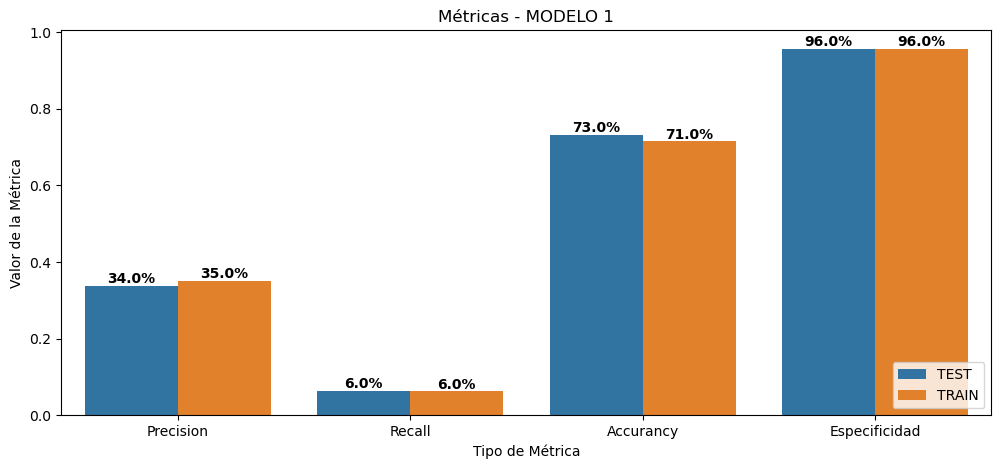

In [43]:
# 2) Calculemos las metricas, para eso vamos a guardar el resultado de cada cuadrante para utilizarlos 

# Paso 1: capturo cada uno de los elementos de la matriz de confusión 
Total_TEST = sum(sum(confusion_test))
Total_TRAIN = sum(sum(confusion_entrenamiento))
TP_TEST = confusion_test[1,1]
TP_TRAIN = confusion_entrenamiento[1,1]
TN_TEST = confusion_test[0,0]
TN_TRAIN = confusion_entrenamiento[0,0]
FP_TEST = confusion_test[0,1]
FP_TRAIN = confusion_entrenamiento[0,1]
FN_TEST = confusion_test[1,0]
FN_TRAIN = confusion_entrenamiento[1,0]

# Paso 2: Calculo métricas
Precision_TEST = TP_TEST / (TP_TEST + FP_TEST)
Precision_TRAIN = TP_TRAIN / (TP_TRAIN + FP_TRAIN)
Recall_TEST = TP_TEST / (TP_TEST + FN_TEST)
Recall_TRAIN = TP_TRAIN / (TP_TRAIN + FN_TRAIN)
Accurancy_TEST = (TP_TEST + TN_TEST) / Total_TEST
Accurancy_TRAIN = (TP_TRAIN + TN_TRAIN) / Total_TRAIN
Especificidad_TEST = TN_TEST / (TN_TEST + FP_TEST)
Especificidad_TRAIN = TN_TRAIN / (TN_TRAIN + FP_TRAIN)

# Paso 3: Presento todo en una misma tabla 
metricas = pd.DataFrame(columns=['Poblacion', 'Metrica','Valor'])

# Precision
nuevo_dato = {'Poblacion': 'TEST', 
              'Metrica': 'Precision',
              'Valor': Precision_TEST}
metricas = pd.concat([metricas, pd.DataFrame([nuevo_dato])], ignore_index=True)
nuevo_dato = {'Poblacion': 'TRAIN', 
              'Metrica': 'Precision',
              'Valor': Precision_TRAIN}
metricas = pd.concat([metricas, pd.DataFrame([nuevo_dato])], ignore_index=True)

# Recall
nuevo_dato = {'Poblacion': 'TEST', 
              'Metrica': 'Recall',
              'Valor': Recall_TEST}
metricas = pd.concat([metricas, pd.DataFrame([nuevo_dato])], ignore_index=True)
nuevo_dato = {'Poblacion': 'TRAIN', 
              'Metrica': 'Recall',
              'Valor': Recall_TRAIN}
metricas = pd.concat([metricas, pd.DataFrame([nuevo_dato])], ignore_index=True)

# Accurancy
nuevo_dato = {'Poblacion': 'TEST', 
              'Metrica': 'Accurancy',
              'Valor': Accurancy_TEST}
metricas = pd.concat([metricas, pd.DataFrame([nuevo_dato])], ignore_index=True)
nuevo_dato = {'Poblacion': 'TRAIN', 
              'Metrica': 'Accurancy',
              'Valor': Accurancy_TRAIN}
metricas = pd.concat([metricas, pd.DataFrame([nuevo_dato])], ignore_index=True)

# Especificidad
nuevo_dato = {'Poblacion': 'TEST', 
              'Metrica': 'Especificidad',
              'Valor': Especificidad_TEST}
metricas = pd.concat([metricas, pd.DataFrame([nuevo_dato])], ignore_index=True)
nuevo_dato = {'Poblacion': 'TRAIN', 
              'Metrica': 'Especificidad',
              'Valor': Especificidad_TRAIN}
metricas = pd.concat([metricas, pd.DataFrame([nuevo_dato])], ignore_index=True)

# Paso 4: Grafico 
plt.figure(figsize=(12, 5))
sns.barplot(data=metricas,
            x='Metrica',
            y='Valor',
            hue='Poblacion')
plt.xlabel('Tipo de Métrica')
plt.ylabel('Valor de la Métrica')
plt.title('Métricas - MODELO 1')
ax = plt.gca()
for p in ax.patches:
    x_text = p.get_x() + p.get_width() / 2.0
    y_text = p.get_height()
    ax.text(x_text, y_text, f'{str(round(y_text, 2) * 100)}%',
            ha='center',
            va='bottom',
            fontsize=10, color='black', fontweight='bold')

plt.legend(loc='lower right')    
plt.show()


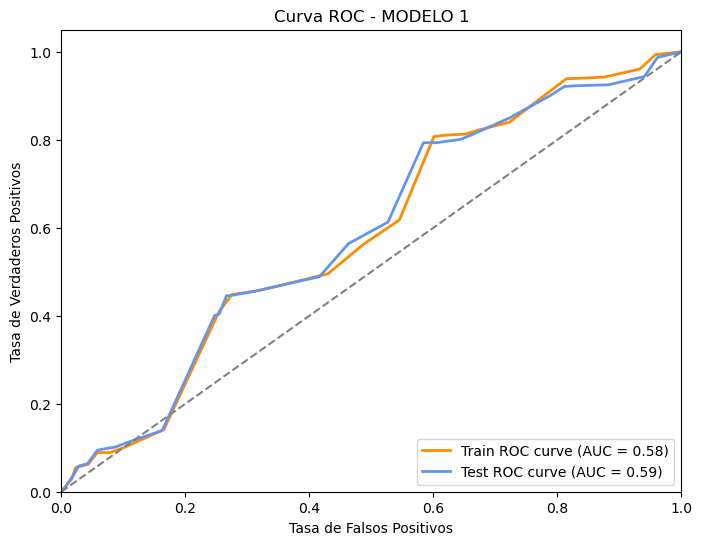

In [44]:
# 3) Curvas de ROC
# Calcula las curvas ROC y el área bajo la curva (AUC) para entrenamiento y prueba

y_train = df1.loc[df1['TRAIN'] == 1,'Churn']
y_train_proba = df1.loc[df1['TRAIN'] == 1,'Predict_Prob_RegLog_1']
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
roc_auc_train = auc(fpr_train, tpr_train)

y_test = df1.loc[df1['TRAIN'] == 0,'Churn']
y_test_proba = df1.loc[df1['TRAIN'] == 0,'Predict_Prob_RegLog_1']
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
roc_auc_test = auc(fpr_test, tpr_test)

# Grafica las curvas ROC en el mismo gráfico
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'Train ROC curve (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='cornflowerblue', lw=2, label=f'Test ROC curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - MODELO 1')
plt.legend(loc='lower right')
plt.show()